In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
treino = pd.read_csv('../../datasets/training_data.csv', encoding='latin1')
teste = pd.read_csv('../../datasets/test_data.csv', encoding='latin1')

----------------------------------------------------------------

**1** - Data Exploration

----------------------------------------------------------------

In [3]:
treino.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [5]:
treino.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [6]:
treino.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

<Axes: >

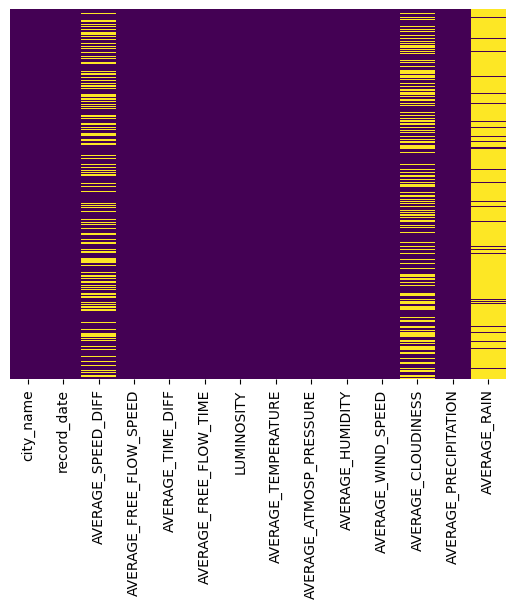

In [7]:
sns.heatmap(treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

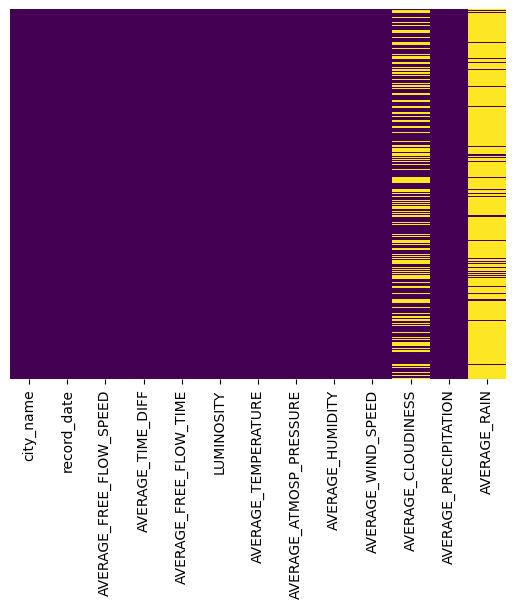

In [8]:
sns.heatmap(teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

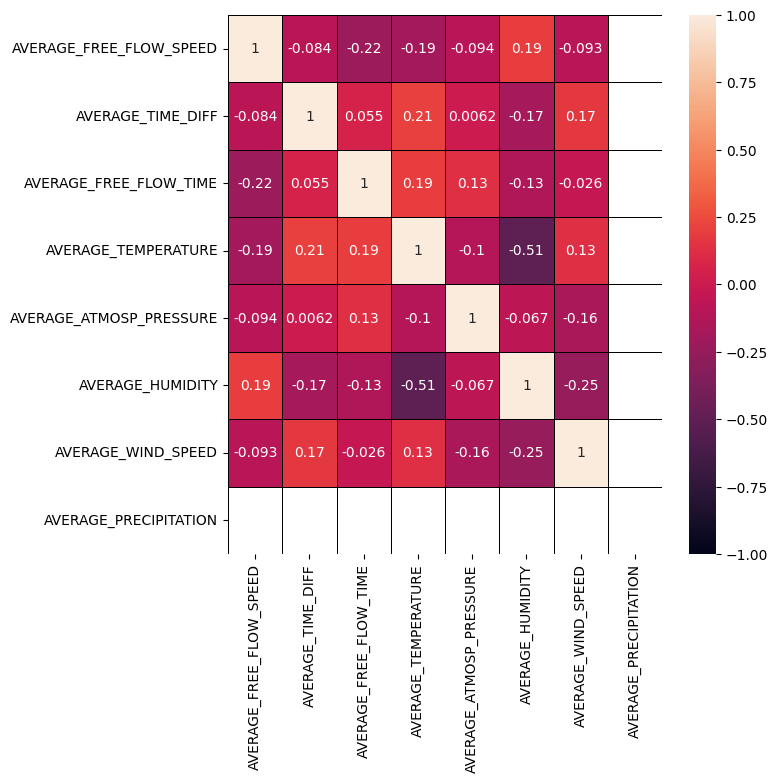

In [8]:
fig = plt.figure(figsize = (7, 7))
treino_corr = treino.corr(method = 'pearson', numeric_only=True)
sns.heatmap(treino_corr, linecolor='black', linewidths=0.5, annot=True, vmax=1, vmin=-1)


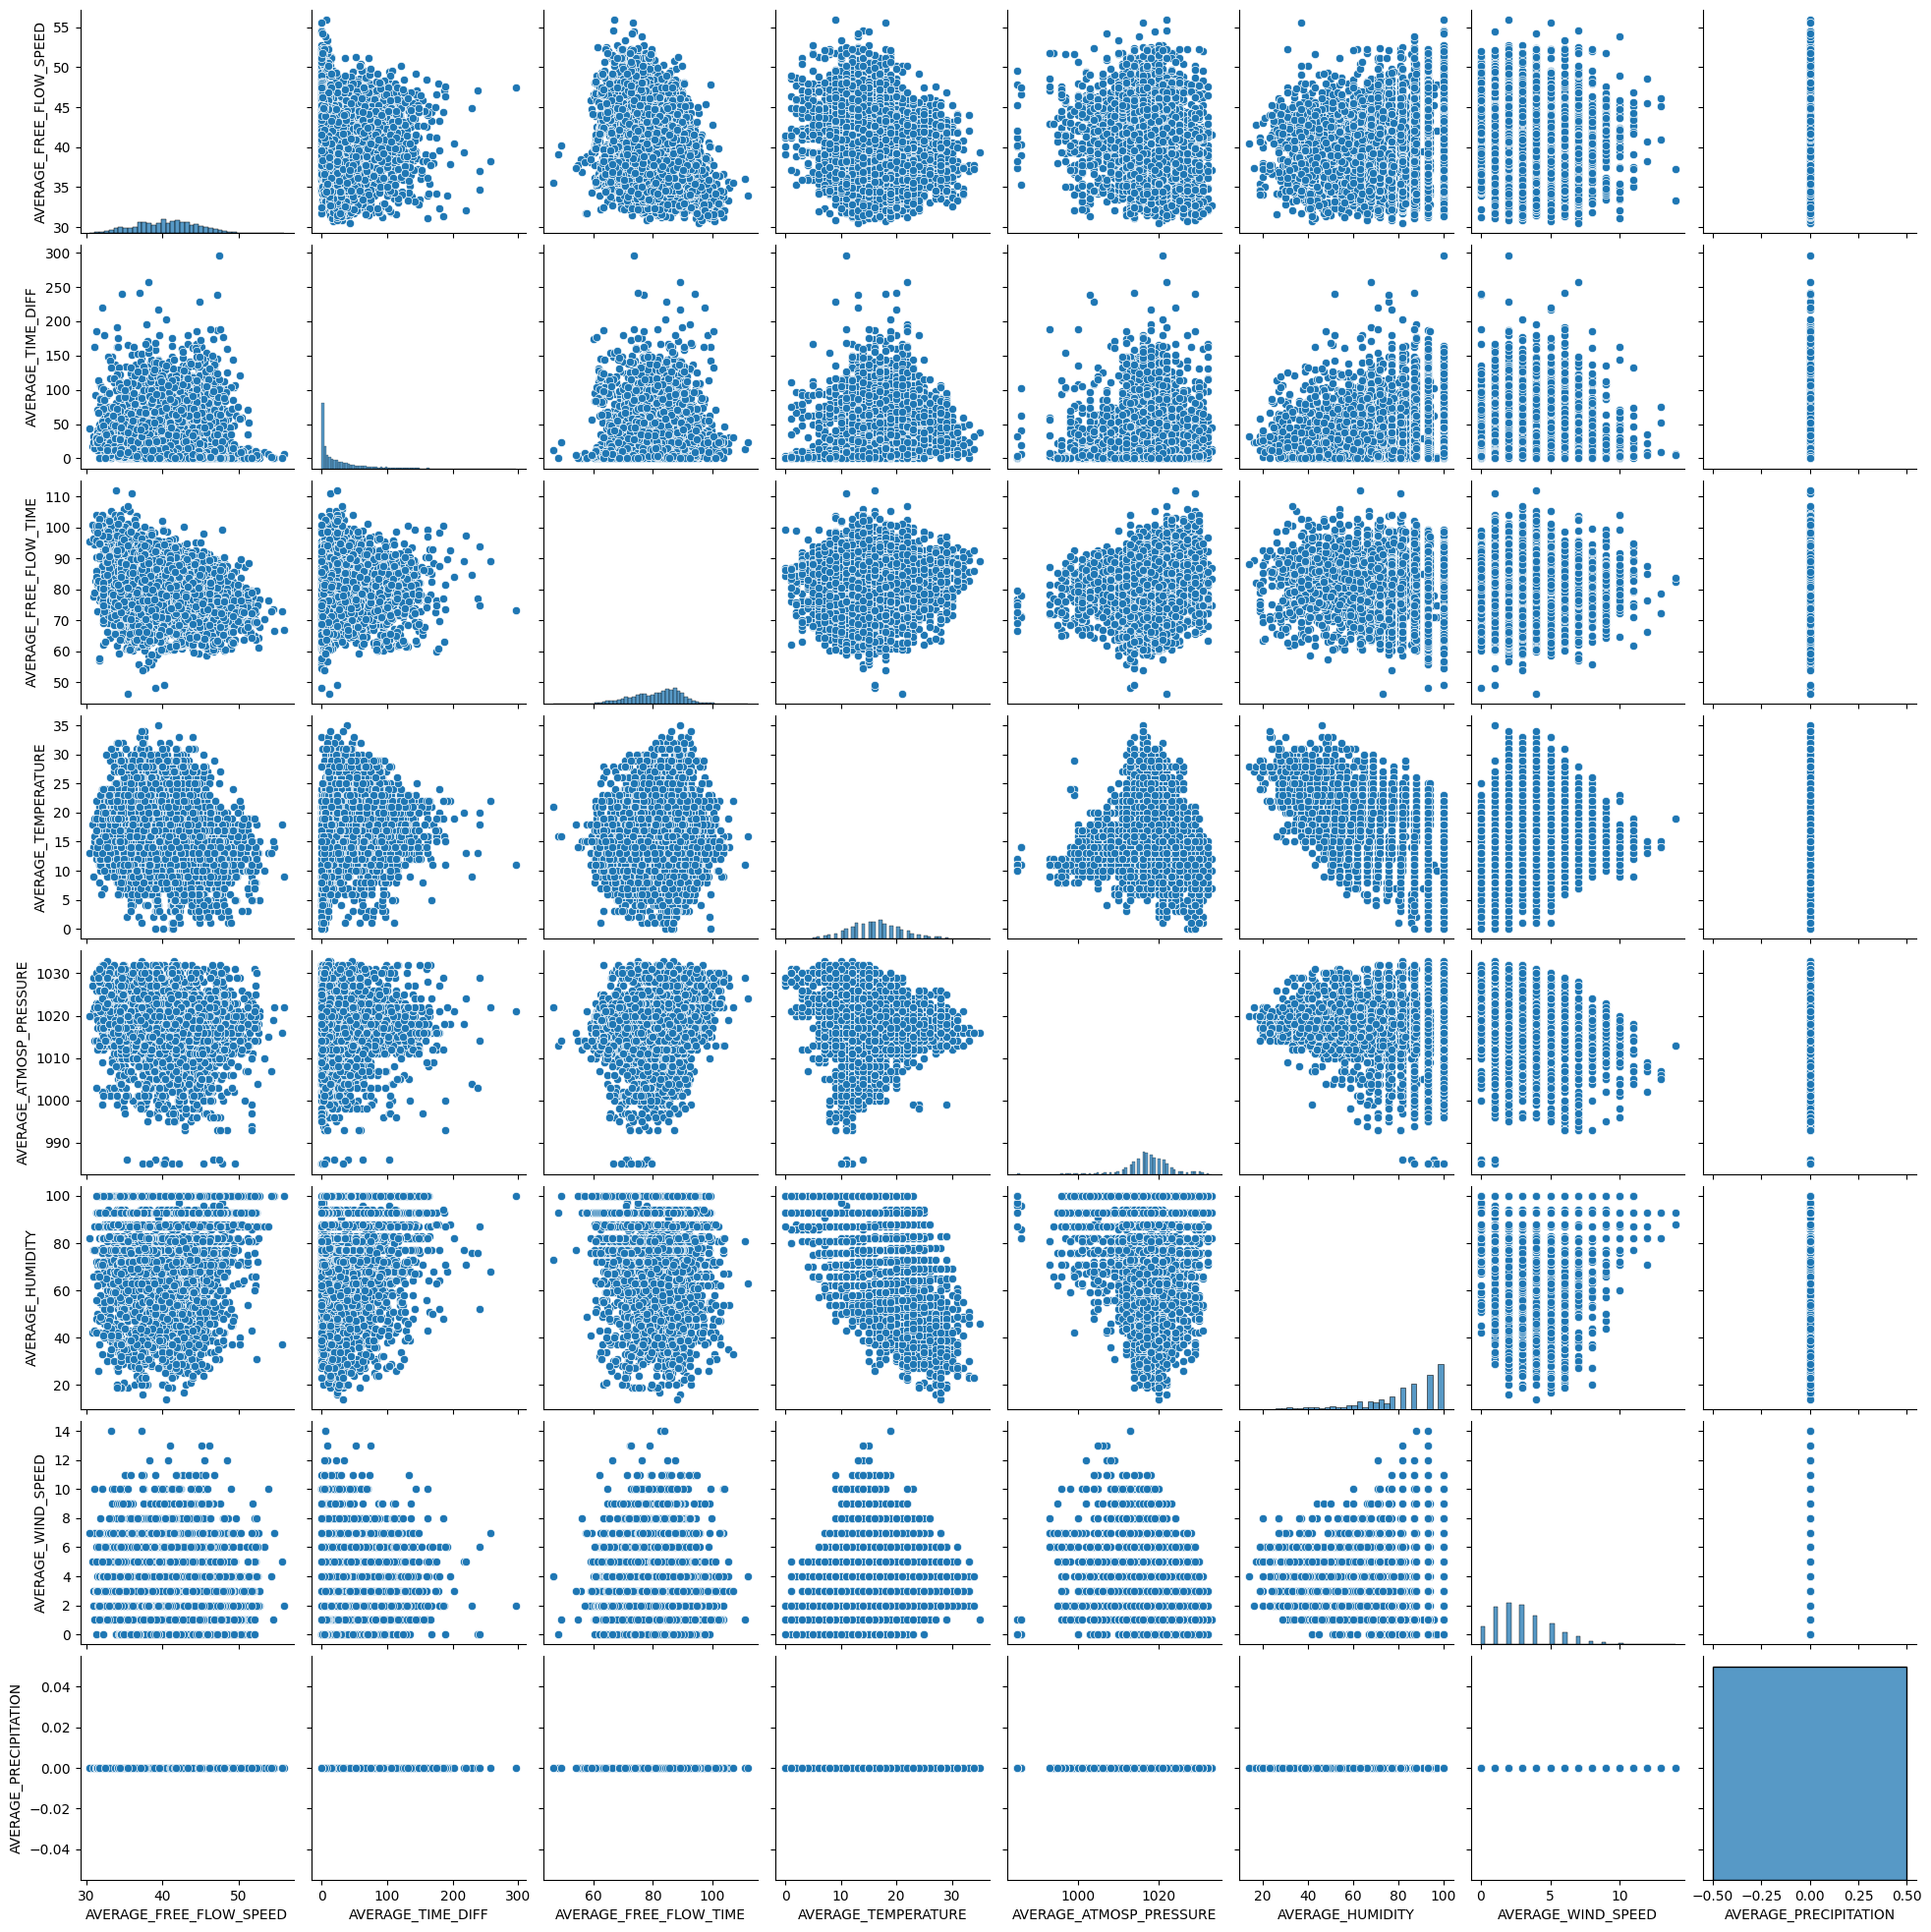

In [9]:
sns.pairplot(treino)

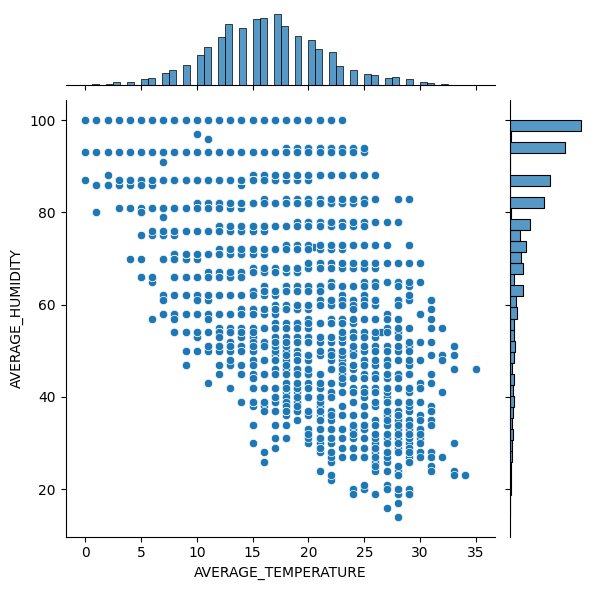

In [10]:
sns.jointplot(x='AVERAGE_TEMPERATURE', y='AVERAGE_HUMIDITY',data=treino)

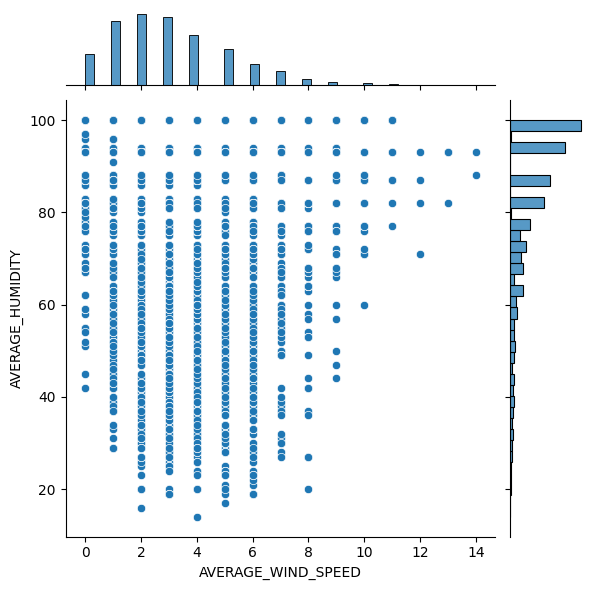

In [11]:
sns.jointplot(x='AVERAGE_WIND_SPEED', y='AVERAGE_HUMIDITY',data=treino)

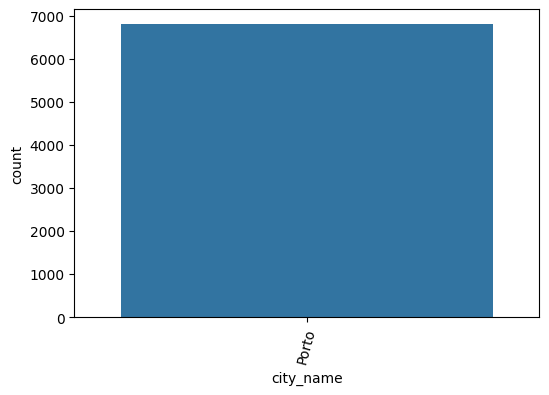

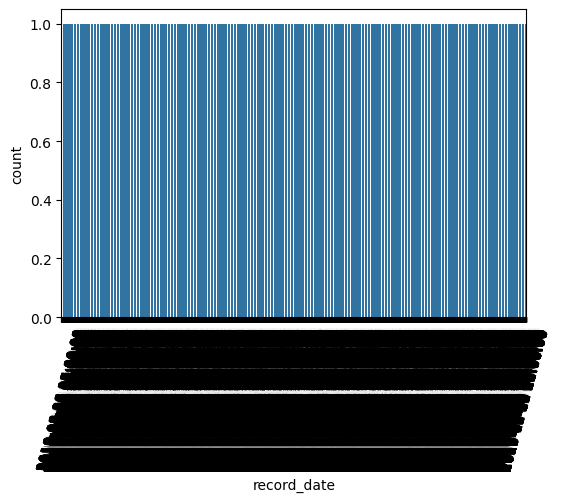

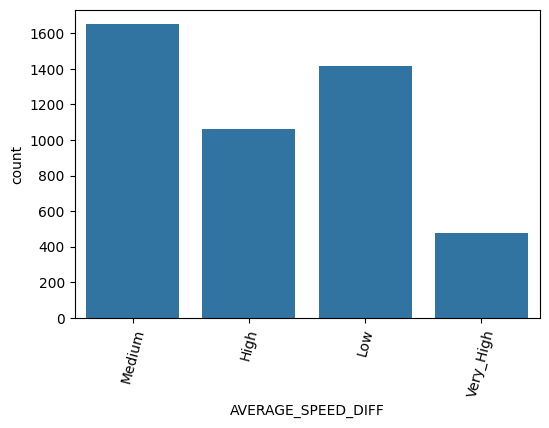

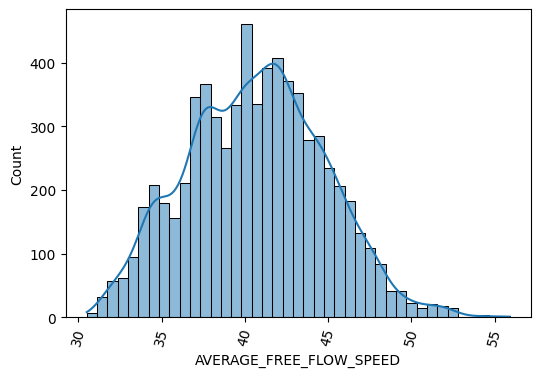

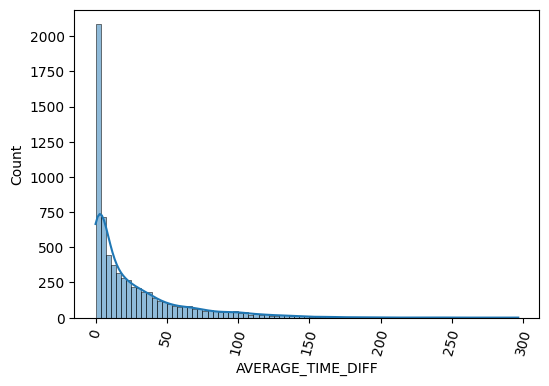

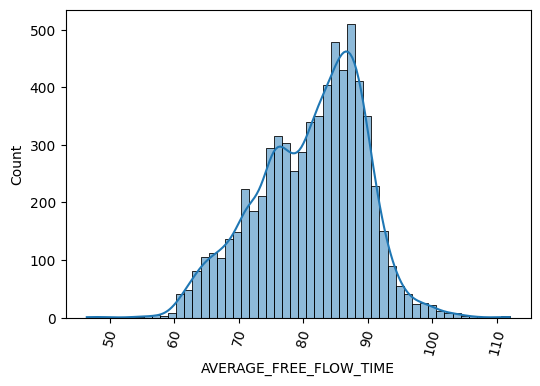

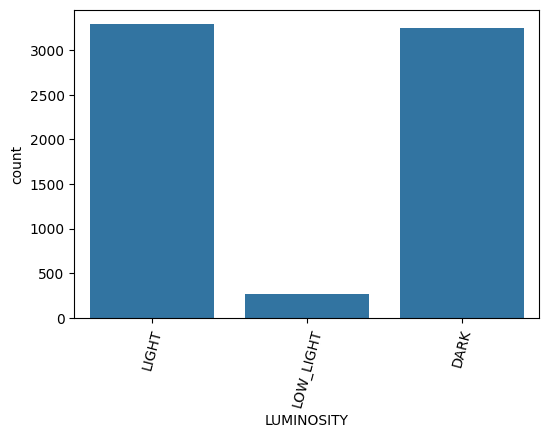

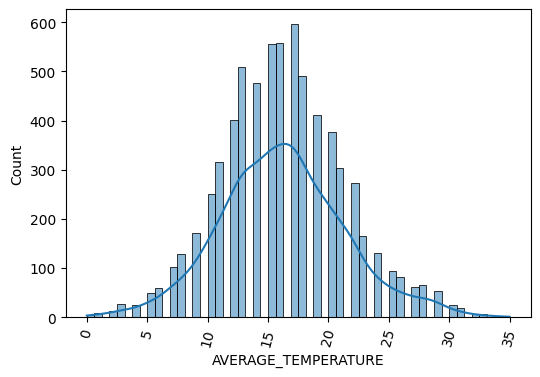

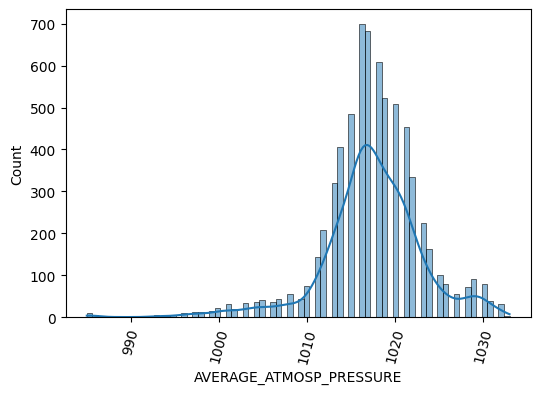

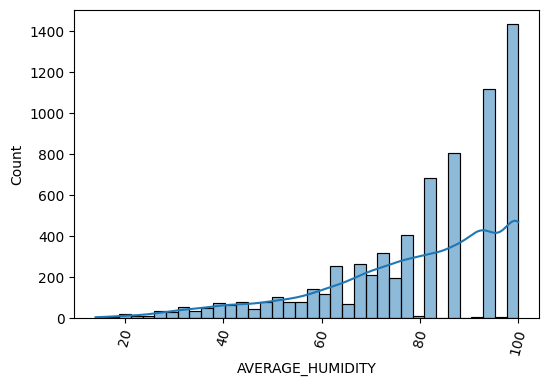

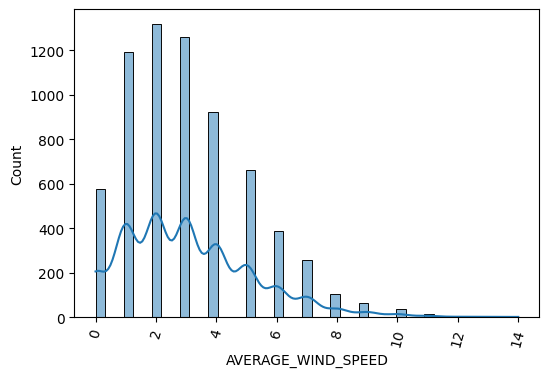

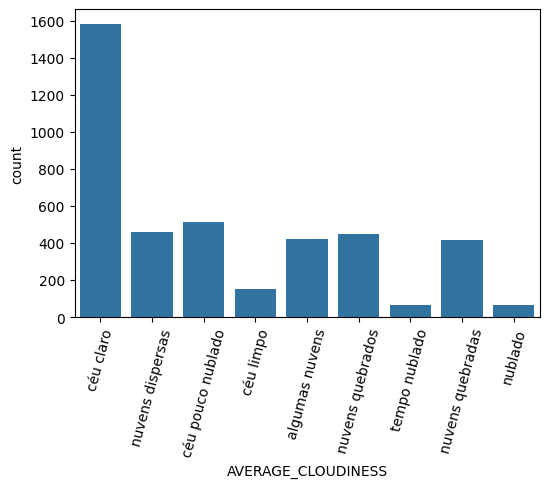

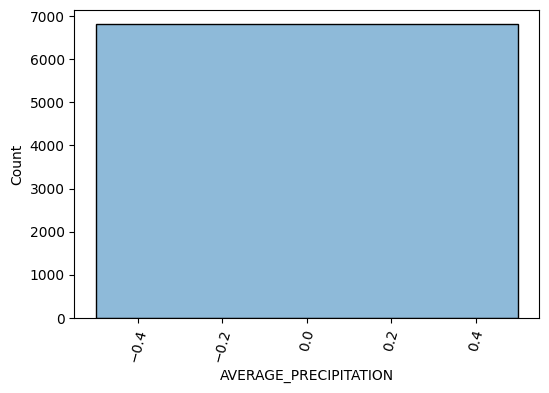

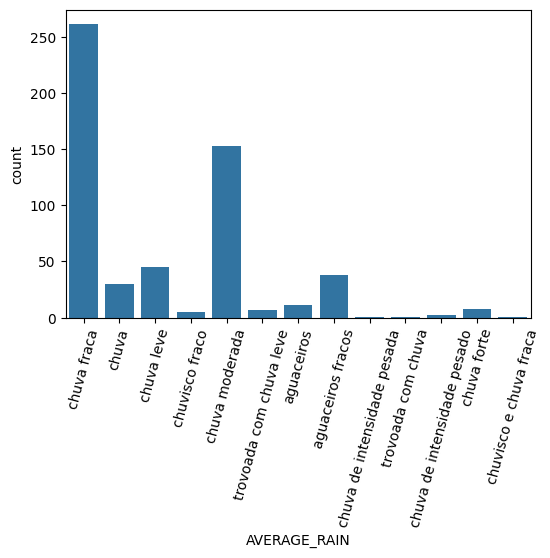

In [12]:
fig.suptitle('Histograms')

for c in treino.columns:
    plt.figure(figsize=(6,4))
    if pd.api.types.is_numeric_dtype(treino[c]):
        sns.histplot(treino[c], kde=True)
        plt.xticks(rotation=75)
    else:
        sns.countplot(x=treino[c])
        plt.xticks(rotation=75)
